### This is the codes to implement Neural Network

* The neural network is build using tensorflow and keras package

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
plt.style.use('seaborn-darkgrid')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix

import graphviz
import pydotplus
import io
import imageio
import math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

In [2]:
path = "Data\cross_sell.csv"
data_set = pd.read_csv(path)
# data_set

In [3]:
# Unique values for all the columns
for col in data_set.columns[~(data_set.columns.isin(['dl', 'insured', 'age', 'id', 'region_code', 'premium', 'channel', 'vintage', 'response']))].tolist():
    print(" Unique Values --> " + col, ':', len(data_set[col].unique()), ': ', data_set[col].unique())

 Unique Values --> gender : 2 :  ['Male' 'Female']
 Unique Values --> vehicle_age : 3 :  ['> 2 Years' '1-2 Year' '< 1 Year']
 Unique Values --> damage : 2 :  ['Yes' 'No']


In [4]:
gender = {'Male': 0, 'Female': 1}
vehicle_age = {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0}
vehicle_damage = {'Yes': 1, 'No': 0}
# vehicle_insured = {0:1, 1:0}

data_set['gender'] = data_set['gender'].map(gender)
data_set['vehicle_age'] = data_set['vehicle_age'].map(vehicle_age)
data_set['damage'] = data_set['damage'].map(vehicle_damage)
# data_set['insured'] = data_set['insured'].map(vehicle_insured)

data_set['age'] = data_set['age'].apply(lambda x: np.int(x))
data_set['dl'] = data_set['dl'].apply(lambda x: np.int(x))
data_set['channel'] = data_set['channel'].apply(lambda x: np.int(x))
data_set['region_code'] = data_set['region_code'].apply(lambda x: np.int(x))
data_set['premium'] = data_set['premium'].apply(lambda x: np.int(x))
data_set['vintage'] = data_set['vintage'].apply(lambda x: np.int(x))
data_set['insured'] = data_set['insured'].apply(lambda x: np.int(x))
data_set['response'] = data_set['response'].apply(lambda x: np.int(x))

data_set

,id,gender,age,dl,region_code,insured,vehicle_age,damage,premium,channel,vintage,response
0,1,0,44,1,28,0,2,1,40454,26,217,1
1,2,0,76,1,3,0,1,0,33536,26,183,0
2,3,0,47,1,28,0,2,1,38294,26,27,1
3,4,0,21,1,11,1,0,0,28619,152,203,0
4,5,1,29,1,41,1,0,0,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1,23,1,8,1,0,0,49438,152,277,0
99996,99997,0,54,1,49,0,1,0,23413,26,56,0
99997,99998,1,26,1,8,1,0,0,22694,152,41,0
99998,99999,0,25,1,8,1,0,0,49994,152,289,0


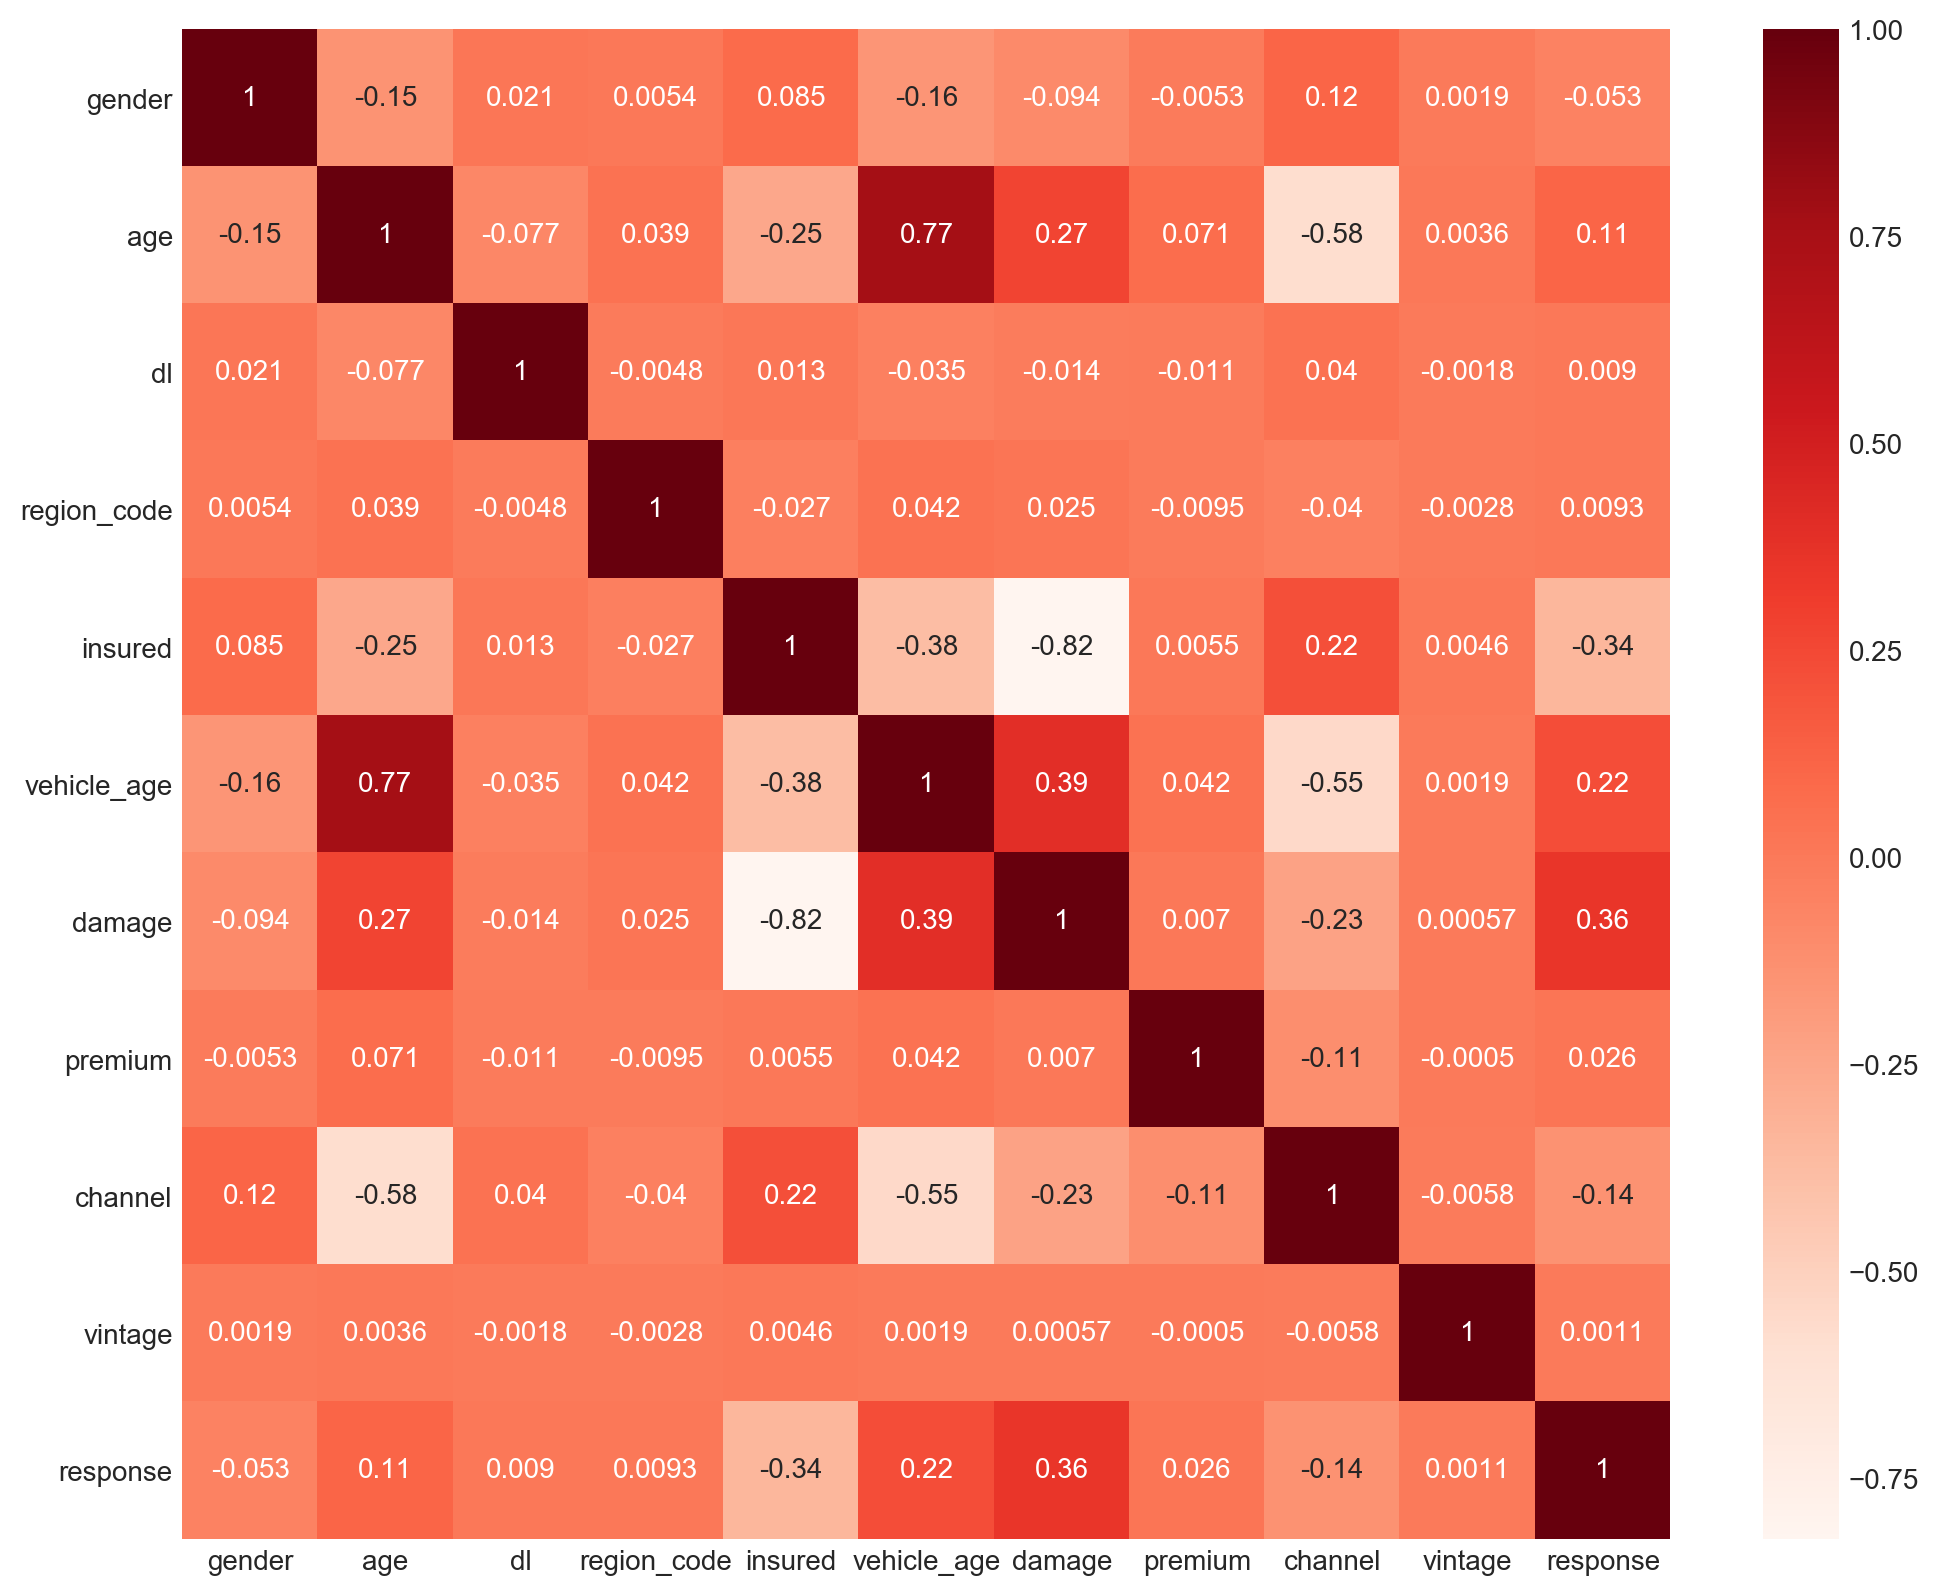

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(12,10), dpi = 200)
cor = data_set.drop(['id'], axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

C:\Software\miniconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


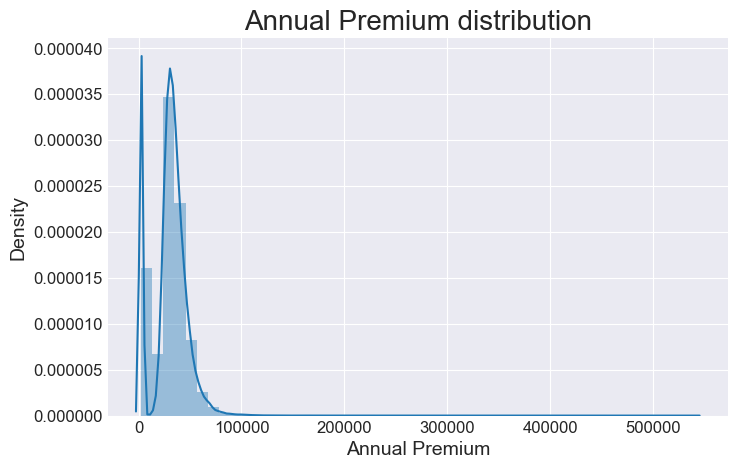

In [6]:
f, axes = plt.subplots(figsize=(8, 5), dpi = 100)
axes.set(xscale='linear')
sns.distplot(data_set['premium'])
plt.title('Annual Premium distribution', fontsize = 20)
axes.tick_params(axis = 'x', labelsize = 12)
axes.tick_params(axis = 'y', labelsize = 12)
axes.set_xlabel("Annual Premium", fontsize=14)
axes.set_ylabel("Density", fontsize=14)
plt.show()

### Data normalization

In [7]:
# Data Normalization
data_set['region_code'] = data_set['region_code'].map(data_set['region_code'].value_counts())
data_set['channel'] = data_set['channel'].map(data_set['channel'].value_counts())
data_set['premium'] = data_set['premium'].apply(lambda x: math.log10(float(x)))

numerical_cols = ['age', 'region_code', 'premium', 'channel', 'vintage']
ss = StandardScaler()
data_set[numerical_cols] = ss.fit_transform(data_set[numerical_cols])
data_set.head()

,id,gender,age,dl,region_code,insured,vehicle_age,damage,premium,channel,vintage,response
0,1,0,0.337994,1,1.570064,0,2,1,0.592800,-0.04676,0.747901,1
1,2,0,2.403931,1,-0.670303,0,1,0,0.406903,-0.04676,0.342018,0
2,3,0,0.531675,1,1.570064,0,2,1,0.538410,-0.04676,-1.520269,1
3,4,0,-1.146898,1,-0.666205,1,0,0,0.249748,1.12441,0.580773,0
4,5,1,-0.630414,1,-0.461315,1,0,0,0.210070,1.12441,-1.377016,0


C:\Software\miniconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


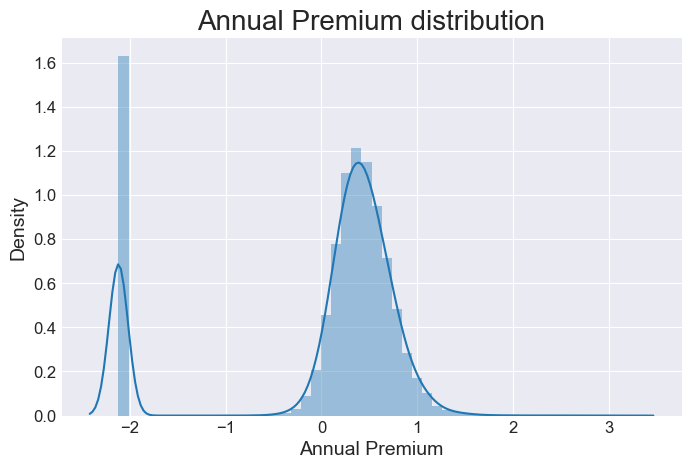

In [8]:
f, axes = plt.subplots(figsize=(8, 5), dpi = 100)
sns.distplot(data_set['premium'])
plt.title('Annual Premium distribution', fontsize = 20)
axes.tick_params(axis = 'x', labelsize = 12)
axes.tick_params(axis = 'y', labelsize = 12)
axes.set_xlabel("Annual Premium", fontsize=14)
axes.set_ylabel("Density", fontsize=14)
plt.show()

In [55]:
features = ['gender', 'age', 'dl', 'region_code', 'insured', 'vehicle_age', 'damage', 'premium', 'channel', 'vintage']
X = data_set[features]
y = data_set['response'].values
np.random.seed(42)
X1, X2, y1, y2 = train_test_split(X, y, test_size = 0.9)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2)

### Build and train NN

In [56]:
X_train.shape

(8000, 10)

In [82]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, input_dim=10, activation='relu', kernel_initializer='random_normal', 
                            kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-5)))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(300, activation='relu', kernel_initializer='random_normal', 
                            kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-5)))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid', kernel_initializer='random_normal', 
                            kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-5)))

In [83]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 300)               3300      
_________________________________________________________________
dropout_14 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 300)               90300     
_________________________________________________________________
dropout_15 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 301       
Total params: 93,901
Trainable params: 93,901
Non-trainable params: 0
_________________________________________________________________


In [84]:
opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.BinaryAccuracy()])

In [85]:
history = model.fit(X_train, y_train, batch_size=64, epochs=1200, verbose=2, validation_data=(X_test, y_test))

Epoch 1/1200
125/125 - 0s - loss: 0.3123 - binary_accuracy: 0.8790 - val_loss: 0.2902 - val_binary_accuracy: 0.8760
Epoch 2/1200
125/125 - 0s - loss: 0.2712 - binary_accuracy: 0.8809 - val_loss: 0.2859 - val_binary_accuracy: 0.8760
Epoch 3/1200
125/125 - 0s - loss: 0.2690 - binary_accuracy: 0.8809 - val_loss: 0.2870 - val_binary_accuracy: 0.8760
Epoch 4/1200
125/125 - 0s - loss: 0.2697 - binary_accuracy: 0.8809 - val_loss: 0.2845 - val_binary_accuracy: 0.8760
Epoch 5/1200
125/125 - 0s - loss: 0.2661 - binary_accuracy: 0.8809 - val_loss: 0.2857 - val_binary_accuracy: 0.8760
Epoch 6/1200
125/125 - 0s - loss: 0.2666 - binary_accuracy: 0.8809 - val_loss: 0.2848 - val_binary_accuracy: 0.8760
Epoch 7/1200
125/125 - 0s - loss: 0.2662 - binary_accuracy: 0.8809 - val_loss: 0.2853 - val_binary_accuracy: 0.8760
Epoch 8/1200
125/125 - 0s - loss: 0.2660 - binary_accuracy: 0.8809 - val_loss: 0.2851 - val_binary_accuracy: 0.8760
Epoch 9/1200
125/125 - 0s - loss: 0.2642 - binary_accuracy: 0.8809 - val

125/125 - 0s - loss: 0.2480 - binary_accuracy: 0.8857 - val_loss: 0.2866 - val_binary_accuracy: 0.8715
Epoch 72/1200
125/125 - 0s - loss: 0.2453 - binary_accuracy: 0.8882 - val_loss: 0.2860 - val_binary_accuracy: 0.8735
Epoch 73/1200
125/125 - 0s - loss: 0.2456 - binary_accuracy: 0.8878 - val_loss: 0.2885 - val_binary_accuracy: 0.8735
Epoch 74/1200
125/125 - 0s - loss: 0.2453 - binary_accuracy: 0.8876 - val_loss: 0.2854 - val_binary_accuracy: 0.8745
Epoch 75/1200
125/125 - 0s - loss: 0.2453 - binary_accuracy: 0.8886 - val_loss: 0.2888 - val_binary_accuracy: 0.8715
Epoch 76/1200
125/125 - 0s - loss: 0.2461 - binary_accuracy: 0.8880 - val_loss: 0.2894 - val_binary_accuracy: 0.8730
Epoch 77/1200
125/125 - 0s - loss: 0.2456 - binary_accuracy: 0.8892 - val_loss: 0.2900 - val_binary_accuracy: 0.8750
Epoch 78/1200
125/125 - 0s - loss: 0.2444 - binary_accuracy: 0.8888 - val_loss: 0.2927 - val_binary_accuracy: 0.8705
Epoch 79/1200
125/125 - 0s - loss: 0.2464 - binary_accuracy: 0.8873 - val_loss

Epoch 141/1200
125/125 - 0s - loss: 0.2299 - binary_accuracy: 0.8946 - val_loss: 0.3056 - val_binary_accuracy: 0.8755
Epoch 142/1200
125/125 - 0s - loss: 0.2276 - binary_accuracy: 0.8944 - val_loss: 0.3101 - val_binary_accuracy: 0.8705
Epoch 143/1200
125/125 - 0s - loss: 0.2282 - binary_accuracy: 0.8946 - val_loss: 0.3102 - val_binary_accuracy: 0.8715
Epoch 144/1200
125/125 - 0s - loss: 0.2302 - binary_accuracy: 0.8932 - val_loss: 0.3078 - val_binary_accuracy: 0.8720
Epoch 145/1200
125/125 - 0s - loss: 0.2301 - binary_accuracy: 0.8954 - val_loss: 0.3069 - val_binary_accuracy: 0.8685
Epoch 146/1200
125/125 - 0s - loss: 0.2287 - binary_accuracy: 0.8930 - val_loss: 0.3045 - val_binary_accuracy: 0.8720
Epoch 147/1200
125/125 - 0s - loss: 0.2282 - binary_accuracy: 0.8966 - val_loss: 0.3054 - val_binary_accuracy: 0.8730
Epoch 148/1200
125/125 - 0s - loss: 0.2262 - binary_accuracy: 0.8956 - val_loss: 0.3113 - val_binary_accuracy: 0.8720
Epoch 149/1200
125/125 - 0s - loss: 0.2276 - binary_accu

Epoch 211/1200
125/125 - 0s - loss: 0.2144 - binary_accuracy: 0.9018 - val_loss: 0.3334 - val_binary_accuracy: 0.8685
Epoch 212/1200
125/125 - 0s - loss: 0.2149 - binary_accuracy: 0.9015 - val_loss: 0.3337 - val_binary_accuracy: 0.8685
Epoch 213/1200
125/125 - 0s - loss: 0.2154 - binary_accuracy: 0.8992 - val_loss: 0.3373 - val_binary_accuracy: 0.8670
Epoch 214/1200
125/125 - 0s - loss: 0.2158 - binary_accuracy: 0.8999 - val_loss: 0.3318 - val_binary_accuracy: 0.8690
Epoch 215/1200
125/125 - 0s - loss: 0.2092 - binary_accuracy: 0.9019 - val_loss: 0.3426 - val_binary_accuracy: 0.8685
Epoch 216/1200
125/125 - 0s - loss: 0.2133 - binary_accuracy: 0.9020 - val_loss: 0.3330 - val_binary_accuracy: 0.8670
Epoch 217/1200
125/125 - 0s - loss: 0.2175 - binary_accuracy: 0.9005 - val_loss: 0.3345 - val_binary_accuracy: 0.8650
Epoch 218/1200
125/125 - 0s - loss: 0.2140 - binary_accuracy: 0.9025 - val_loss: 0.3374 - val_binary_accuracy: 0.8625
Epoch 219/1200
125/125 - 0s - loss: 0.2129 - binary_accu

Epoch 281/1200
125/125 - 0s - loss: 0.2018 - binary_accuracy: 0.9081 - val_loss: 0.3658 - val_binary_accuracy: 0.8625
Epoch 282/1200
125/125 - 0s - loss: 0.2027 - binary_accuracy: 0.9087 - val_loss: 0.3752 - val_binary_accuracy: 0.8655
Epoch 283/1200
125/125 - 0s - loss: 0.2049 - binary_accuracy: 0.9057 - val_loss: 0.3706 - val_binary_accuracy: 0.8700
Epoch 284/1200
125/125 - 0s - loss: 0.2026 - binary_accuracy: 0.9081 - val_loss: 0.3687 - val_binary_accuracy: 0.8655
Epoch 285/1200
125/125 - 0s - loss: 0.2021 - binary_accuracy: 0.9074 - val_loss: 0.3727 - val_binary_accuracy: 0.8675
Epoch 286/1200
125/125 - 0s - loss: 0.2026 - binary_accuracy: 0.9071 - val_loss: 0.3553 - val_binary_accuracy: 0.8650
Epoch 287/1200
125/125 - 0s - loss: 0.2016 - binary_accuracy: 0.9081 - val_loss: 0.3687 - val_binary_accuracy: 0.8620
Epoch 288/1200
125/125 - 0s - loss: 0.2034 - binary_accuracy: 0.9055 - val_loss: 0.3710 - val_binary_accuracy: 0.8640
Epoch 289/1200
125/125 - 0s - loss: 0.1984 - binary_accu

Epoch 351/1200
125/125 - 0s - loss: 0.1935 - binary_accuracy: 0.9122 - val_loss: 0.3958 - val_binary_accuracy: 0.8560
Epoch 352/1200
125/125 - 0s - loss: 0.1938 - binary_accuracy: 0.9139 - val_loss: 0.3986 - val_binary_accuracy: 0.8600
Epoch 353/1200
125/125 - 0s - loss: 0.1914 - binary_accuracy: 0.9129 - val_loss: 0.4018 - val_binary_accuracy: 0.8610
Epoch 354/1200
125/125 - 0s - loss: 0.1933 - binary_accuracy: 0.9149 - val_loss: 0.3983 - val_binary_accuracy: 0.8595
Epoch 355/1200
125/125 - 0s - loss: 0.1945 - binary_accuracy: 0.9104 - val_loss: 0.3910 - val_binary_accuracy: 0.8580
Epoch 356/1200
125/125 - 0s - loss: 0.1941 - binary_accuracy: 0.9118 - val_loss: 0.3979 - val_binary_accuracy: 0.8620
Epoch 357/1200
125/125 - 0s - loss: 0.1951 - binary_accuracy: 0.9093 - val_loss: 0.3977 - val_binary_accuracy: 0.8640
Epoch 358/1200
125/125 - 0s - loss: 0.1937 - binary_accuracy: 0.9136 - val_loss: 0.4093 - val_binary_accuracy: 0.8590
Epoch 359/1200
125/125 - 0s - loss: 0.1920 - binary_accu

Epoch 421/1200
125/125 - 0s - loss: 0.1911 - binary_accuracy: 0.9136 - val_loss: 0.4180 - val_binary_accuracy: 0.8570
Epoch 422/1200
125/125 - 0s - loss: 0.1848 - binary_accuracy: 0.9181 - val_loss: 0.4245 - val_binary_accuracy: 0.8545
Epoch 423/1200
125/125 - 0s - loss: 0.1878 - binary_accuracy: 0.9174 - val_loss: 0.4257 - val_binary_accuracy: 0.8585
Epoch 424/1200
125/125 - 0s - loss: 0.1832 - binary_accuracy: 0.9172 - val_loss: 0.4269 - val_binary_accuracy: 0.8480
Epoch 425/1200
125/125 - 0s - loss: 0.1824 - binary_accuracy: 0.9165 - val_loss: 0.4244 - val_binary_accuracy: 0.8615
Epoch 426/1200
125/125 - 0s - loss: 0.1837 - binary_accuracy: 0.9199 - val_loss: 0.4351 - val_binary_accuracy: 0.8540
Epoch 427/1200
125/125 - 0s - loss: 0.1783 - binary_accuracy: 0.9210 - val_loss: 0.4264 - val_binary_accuracy: 0.8610
Epoch 428/1200
125/125 - 0s - loss: 0.1876 - binary_accuracy: 0.9158 - val_loss: 0.4168 - val_binary_accuracy: 0.8570
Epoch 429/1200
125/125 - 0s - loss: 0.1867 - binary_accu

Epoch 491/1200
125/125 - 0s - loss: 0.1793 - binary_accuracy: 0.9184 - val_loss: 0.4496 - val_binary_accuracy: 0.8515
Epoch 492/1200
125/125 - 0s - loss: 0.1817 - binary_accuracy: 0.9211 - val_loss: 0.4437 - val_binary_accuracy: 0.8575
Epoch 493/1200
125/125 - 0s - loss: 0.1822 - binary_accuracy: 0.9195 - val_loss: 0.4313 - val_binary_accuracy: 0.8485
Epoch 494/1200
125/125 - 0s - loss: 0.1838 - binary_accuracy: 0.9197 - val_loss: 0.4575 - val_binary_accuracy: 0.8555
Epoch 495/1200
125/125 - 0s - loss: 0.1838 - binary_accuracy: 0.9191 - val_loss: 0.4411 - val_binary_accuracy: 0.8530
Epoch 496/1200
125/125 - 0s - loss: 0.1748 - binary_accuracy: 0.9220 - val_loss: 0.4574 - val_binary_accuracy: 0.8510
Epoch 497/1200
125/125 - 0s - loss: 0.1774 - binary_accuracy: 0.9234 - val_loss: 0.4450 - val_binary_accuracy: 0.8515
Epoch 498/1200
125/125 - 0s - loss: 0.1794 - binary_accuracy: 0.9215 - val_loss: 0.4397 - val_binary_accuracy: 0.8530
Epoch 499/1200
125/125 - 0s - loss: 0.1837 - binary_accu

Epoch 561/1200
125/125 - 0s - loss: 0.1749 - binary_accuracy: 0.9227 - val_loss: 0.4695 - val_binary_accuracy: 0.8515
Epoch 562/1200
125/125 - 0s - loss: 0.1795 - binary_accuracy: 0.9222 - val_loss: 0.4557 - val_binary_accuracy: 0.8500
Epoch 563/1200
125/125 - 0s - loss: 0.1765 - binary_accuracy: 0.9234 - val_loss: 0.4687 - val_binary_accuracy: 0.8475
Epoch 564/1200
125/125 - 0s - loss: 0.1718 - binary_accuracy: 0.9254 - val_loss: 0.4839 - val_binary_accuracy: 0.8525
Epoch 565/1200
125/125 - 0s - loss: 0.1698 - binary_accuracy: 0.9258 - val_loss: 0.4786 - val_binary_accuracy: 0.8455
Epoch 566/1200
125/125 - 0s - loss: 0.1714 - binary_accuracy: 0.9234 - val_loss: 0.4910 - val_binary_accuracy: 0.8510
Epoch 567/1200
125/125 - 0s - loss: 0.1764 - binary_accuracy: 0.9215 - val_loss: 0.4755 - val_binary_accuracy: 0.8430
Epoch 568/1200
125/125 - 0s - loss: 0.1750 - binary_accuracy: 0.9240 - val_loss: 0.4719 - val_binary_accuracy: 0.8450
Epoch 569/1200
125/125 - 0s - loss: 0.1733 - binary_accu

Epoch 631/1200
125/125 - 0s - loss: 0.1712 - binary_accuracy: 0.9266 - val_loss: 0.4953 - val_binary_accuracy: 0.8450
Epoch 632/1200
125/125 - 0s - loss: 0.1698 - binary_accuracy: 0.9264 - val_loss: 0.4845 - val_binary_accuracy: 0.8525
Epoch 633/1200
125/125 - 0s - loss: 0.1712 - binary_accuracy: 0.9264 - val_loss: 0.5051 - val_binary_accuracy: 0.8515
Epoch 634/1200
125/125 - 0s - loss: 0.1769 - binary_accuracy: 0.9229 - val_loss: 0.4724 - val_binary_accuracy: 0.8420
Epoch 635/1200
125/125 - 0s - loss: 0.1681 - binary_accuracy: 0.9266 - val_loss: 0.4941 - val_binary_accuracy: 0.8405
Epoch 636/1200
125/125 - 0s - loss: 0.1723 - binary_accuracy: 0.9260 - val_loss: 0.4976 - val_binary_accuracy: 0.8505
Epoch 637/1200
125/125 - 0s - loss: 0.1721 - binary_accuracy: 0.9244 - val_loss: 0.4836 - val_binary_accuracy: 0.8485
Epoch 638/1200
125/125 - 0s - loss: 0.1658 - binary_accuracy: 0.9250 - val_loss: 0.5091 - val_binary_accuracy: 0.8530
Epoch 639/1200
125/125 - 0s - loss: 0.1668 - binary_accu

Epoch 701/1200
125/125 - 0s - loss: 0.1666 - binary_accuracy: 0.9249 - val_loss: 0.5311 - val_binary_accuracy: 0.8445
Epoch 702/1200
125/125 - 0s - loss: 0.1687 - binary_accuracy: 0.9274 - val_loss: 0.5151 - val_binary_accuracy: 0.8405
Epoch 703/1200
125/125 - 0s - loss: 0.1646 - binary_accuracy: 0.9320 - val_loss: 0.5290 - val_binary_accuracy: 0.8460
Epoch 704/1200
125/125 - 0s - loss: 0.1691 - binary_accuracy: 0.9266 - val_loss: 0.5248 - val_binary_accuracy: 0.8410
Epoch 705/1200
125/125 - 0s - loss: 0.1684 - binary_accuracy: 0.9270 - val_loss: 0.5248 - val_binary_accuracy: 0.8425
Epoch 706/1200
125/125 - 0s - loss: 0.1678 - binary_accuracy: 0.9279 - val_loss: 0.5145 - val_binary_accuracy: 0.8465
Epoch 707/1200
125/125 - 0s - loss: 0.1668 - binary_accuracy: 0.9262 - val_loss: 0.5141 - val_binary_accuracy: 0.8500
Epoch 708/1200
125/125 - 0s - loss: 0.1653 - binary_accuracy: 0.9295 - val_loss: 0.5079 - val_binary_accuracy: 0.8450
Epoch 709/1200
125/125 - 0s - loss: 0.1638 - binary_accu

Epoch 771/1200
125/125 - 0s - loss: 0.1648 - binary_accuracy: 0.9255 - val_loss: 0.5388 - val_binary_accuracy: 0.8400
Epoch 772/1200
125/125 - 0s - loss: 0.1614 - binary_accuracy: 0.9323 - val_loss: 0.5405 - val_binary_accuracy: 0.8465
Epoch 773/1200
125/125 - 0s - loss: 0.1625 - binary_accuracy: 0.9314 - val_loss: 0.5463 - val_binary_accuracy: 0.8400
Epoch 774/1200
125/125 - 0s - loss: 0.1541 - binary_accuracy: 0.9323 - val_loss: 0.5484 - val_binary_accuracy: 0.8475
Epoch 775/1200
125/125 - 0s - loss: 0.1626 - binary_accuracy: 0.9296 - val_loss: 0.5460 - val_binary_accuracy: 0.8450
Epoch 776/1200
125/125 - 0s - loss: 0.1610 - binary_accuracy: 0.9301 - val_loss: 0.5439 - val_binary_accuracy: 0.8520
Epoch 777/1200
125/125 - 0s - loss: 0.1670 - binary_accuracy: 0.9266 - val_loss: 0.5390 - val_binary_accuracy: 0.8435
Epoch 778/1200
125/125 - 0s - loss: 0.1602 - binary_accuracy: 0.9325 - val_loss: 0.5279 - val_binary_accuracy: 0.8450
Epoch 779/1200
125/125 - 0s - loss: 0.1619 - binary_accu

Epoch 841/1200
125/125 - 0s - loss: 0.1569 - binary_accuracy: 0.9333 - val_loss: 0.5754 - val_binary_accuracy: 0.8470
Epoch 842/1200
125/125 - 0s - loss: 0.1611 - binary_accuracy: 0.9311 - val_loss: 0.5565 - val_binary_accuracy: 0.8485
Epoch 843/1200
125/125 - 0s - loss: 0.1605 - binary_accuracy: 0.9337 - val_loss: 0.5441 - val_binary_accuracy: 0.8460
Epoch 844/1200
125/125 - 0s - loss: 0.1608 - binary_accuracy: 0.9311 - val_loss: 0.5536 - val_binary_accuracy: 0.8425
Epoch 845/1200
125/125 - 0s - loss: 0.1583 - binary_accuracy: 0.9336 - val_loss: 0.5551 - val_binary_accuracy: 0.8430
Epoch 846/1200
125/125 - 0s - loss: 0.1545 - binary_accuracy: 0.9350 - val_loss: 0.5559 - val_binary_accuracy: 0.8425
Epoch 847/1200
125/125 - 0s - loss: 0.1653 - binary_accuracy: 0.9319 - val_loss: 0.5419 - val_binary_accuracy: 0.8370
Epoch 848/1200
125/125 - 0s - loss: 0.1604 - binary_accuracy: 0.9312 - val_loss: 0.5535 - val_binary_accuracy: 0.8460
Epoch 849/1200
125/125 - 0s - loss: 0.1561 - binary_accu

Epoch 911/1200
125/125 - 0s - loss: 0.1606 - binary_accuracy: 0.9290 - val_loss: 0.5816 - val_binary_accuracy: 0.8345
Epoch 912/1200
125/125 - 0s - loss: 0.1547 - binary_accuracy: 0.9345 - val_loss: 0.5656 - val_binary_accuracy: 0.8360
Epoch 913/1200
125/125 - 0s - loss: 0.1577 - binary_accuracy: 0.9323 - val_loss: 0.5640 - val_binary_accuracy: 0.8375
Epoch 914/1200
125/125 - 0s - loss: 0.1574 - binary_accuracy: 0.9337 - val_loss: 0.5730 - val_binary_accuracy: 0.8425
Epoch 915/1200
125/125 - 0s - loss: 0.1593 - binary_accuracy: 0.9329 - val_loss: 0.5768 - val_binary_accuracy: 0.8420
Epoch 916/1200
125/125 - 0s - loss: 0.1595 - binary_accuracy: 0.9321 - val_loss: 0.5556 - val_binary_accuracy: 0.8315
Epoch 917/1200
125/125 - 0s - loss: 0.1539 - binary_accuracy: 0.9361 - val_loss: 0.5854 - val_binary_accuracy: 0.8400
Epoch 918/1200
125/125 - 0s - loss: 0.1554 - binary_accuracy: 0.9350 - val_loss: 0.5814 - val_binary_accuracy: 0.8405
Epoch 919/1200
125/125 - 0s - loss: 0.1572 - binary_accu

Epoch 981/1200
125/125 - 0s - loss: 0.1472 - binary_accuracy: 0.9401 - val_loss: 0.6316 - val_binary_accuracy: 0.8455
Epoch 982/1200
125/125 - 0s - loss: 0.1498 - binary_accuracy: 0.9360 - val_loss: 0.5967 - val_binary_accuracy: 0.8410
Epoch 983/1200
125/125 - 0s - loss: 0.1589 - binary_accuracy: 0.9351 - val_loss: 0.5996 - val_binary_accuracy: 0.8410
Epoch 984/1200
125/125 - 0s - loss: 0.1581 - binary_accuracy: 0.9361 - val_loss: 0.5917 - val_binary_accuracy: 0.8430
Epoch 985/1200
125/125 - 0s - loss: 0.1553 - binary_accuracy: 0.9358 - val_loss: 0.5708 - val_binary_accuracy: 0.8350
Epoch 986/1200
125/125 - 0s - loss: 0.1558 - binary_accuracy: 0.9355 - val_loss: 0.5778 - val_binary_accuracy: 0.8370
Epoch 987/1200
125/125 - 0s - loss: 0.1573 - binary_accuracy: 0.9355 - val_loss: 0.5911 - val_binary_accuracy: 0.8455
Epoch 988/1200
125/125 - 0s - loss: 0.1589 - binary_accuracy: 0.9336 - val_loss: 0.5914 - val_binary_accuracy: 0.8455
Epoch 989/1200
125/125 - 0s - loss: 0.1519 - binary_accu

125/125 - 0s - loss: 0.1530 - binary_accuracy: 0.9345 - val_loss: 0.5998 - val_binary_accuracy: 0.8450
Epoch 1051/1200
125/125 - 0s - loss: 0.1493 - binary_accuracy: 0.9364 - val_loss: 0.5852 - val_binary_accuracy: 0.8355
Epoch 1052/1200
125/125 - 0s - loss: 0.1468 - binary_accuracy: 0.9410 - val_loss: 0.6174 - val_binary_accuracy: 0.8435
Epoch 1053/1200
125/125 - 0s - loss: 0.1517 - binary_accuracy: 0.9349 - val_loss: 0.5877 - val_binary_accuracy: 0.8380
Epoch 1054/1200
125/125 - 0s - loss: 0.1517 - binary_accuracy: 0.9385 - val_loss: 0.6127 - val_binary_accuracy: 0.8360
Epoch 1055/1200
125/125 - 0s - loss: 0.1494 - binary_accuracy: 0.9380 - val_loss: 0.6339 - val_binary_accuracy: 0.8360
Epoch 1056/1200
125/125 - 0s - loss: 0.1542 - binary_accuracy: 0.9377 - val_loss: 0.5993 - val_binary_accuracy: 0.8425
Epoch 1057/1200
125/125 - 0s - loss: 0.1535 - binary_accuracy: 0.9356 - val_loss: 0.5944 - val_binary_accuracy: 0.8385
Epoch 1058/1200
125/125 - 0s - loss: 0.1542 - binary_accuracy: 0

Epoch 1119/1200
125/125 - 0s - loss: 0.1511 - binary_accuracy: 0.9394 - val_loss: 0.6075 - val_binary_accuracy: 0.8395
Epoch 1120/1200
125/125 - 0s - loss: 0.1508 - binary_accuracy: 0.9386 - val_loss: 0.6305 - val_binary_accuracy: 0.8395
Epoch 1121/1200
125/125 - 0s - loss: 0.1492 - binary_accuracy: 0.9377 - val_loss: 0.6068 - val_binary_accuracy: 0.8365
Epoch 1122/1200
125/125 - 0s - loss: 0.1476 - binary_accuracy: 0.9360 - val_loss: 0.6250 - val_binary_accuracy: 0.8360
Epoch 1123/1200
125/125 - 0s - loss: 0.1488 - binary_accuracy: 0.9441 - val_loss: 0.6336 - val_binary_accuracy: 0.8420
Epoch 1124/1200
125/125 - 0s - loss: 0.1572 - binary_accuracy: 0.9361 - val_loss: 0.6155 - val_binary_accuracy: 0.8410
Epoch 1125/1200
125/125 - 0s - loss: 0.1528 - binary_accuracy: 0.9377 - val_loss: 0.6022 - val_binary_accuracy: 0.8370
Epoch 1126/1200
125/125 - 0s - loss: 0.1478 - binary_accuracy: 0.9383 - val_loss: 0.6208 - val_binary_accuracy: 0.8400
Epoch 1127/1200
125/125 - 0s - loss: 0.1554 - bi

Epoch 1188/1200
125/125 - 0s - loss: 0.1469 - binary_accuracy: 0.9405 - val_loss: 0.6129 - val_binary_accuracy: 0.8435
Epoch 1189/1200
125/125 - 0s - loss: 0.1508 - binary_accuracy: 0.9371 - val_loss: 0.6334 - val_binary_accuracy: 0.8385
Epoch 1190/1200
125/125 - 0s - loss: 0.1473 - binary_accuracy: 0.9413 - val_loss: 0.6303 - val_binary_accuracy: 0.8390
Epoch 1191/1200
125/125 - 0s - loss: 0.1510 - binary_accuracy: 0.9369 - val_loss: 0.6157 - val_binary_accuracy: 0.8395
Epoch 1192/1200
125/125 - 0s - loss: 0.1455 - binary_accuracy: 0.9392 - val_loss: 0.6193 - val_binary_accuracy: 0.8365
Epoch 1193/1200
125/125 - 0s - loss: 0.1529 - binary_accuracy: 0.9369 - val_loss: 0.6220 - val_binary_accuracy: 0.8385
Epoch 1194/1200
125/125 - 0s - loss: 0.1497 - binary_accuracy: 0.9381 - val_loss: 0.6276 - val_binary_accuracy: 0.8405
Epoch 1195/1200
125/125 - 0s - loss: 0.1475 - binary_accuracy: 0.9390 - val_loss: 0.6280 - val_binary_accuracy: 0.8340
Epoch 1196/1200
125/125 - 0s - loss: 0.1437 - bi

In [86]:
score_train = model.evaluate(X_train, y_train)
score_test = model.evaluate(X_test, y_test)
print(score_train)
print(score_test)

63/63 [==============================] - 0s 735us/step - loss: 0.6197 - binary_accuracy: 0.8345
[0.11013291031122208, 0.968874990940094]
[0.6196667551994324, 0.8345000147819519]


Train: 0.969, Test: 0.835


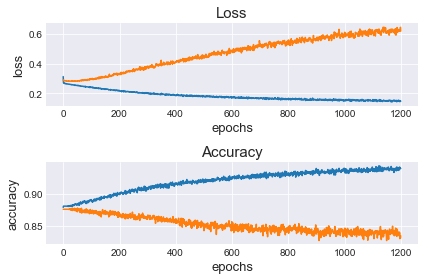

In [87]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training

fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], label='train')
ax[0].plot(history.history['val_loss'], label='test')
ax[0].set_xlabel("epochs", fontsize=13)
ax[0].set_ylabel("loss", fontsize=13)
ax[0].set_title("Loss", fontsize=15)

ax[1].plot(history.history['binary_accuracy'], label='train')
ax[1].plot(history.history['val_binary_accuracy'], label='test')
ax[1].set_xlabel("epochs", fontsize=13)
ax[1].set_ylabel("accuracy", fontsize=13)
ax[1].set_title("Accuracy", fontsize=15)
fig.tight_layout()

In [89]:
features = ['gender', 'age', 'dl', 'region_code', 'insured', 'vehicle_age', 'damage', 'premium', 'channel', 'vintage']
X = data_set[features]
y = data_set['response'].values
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Text(0.5, 40.08333333333333, 'Features')

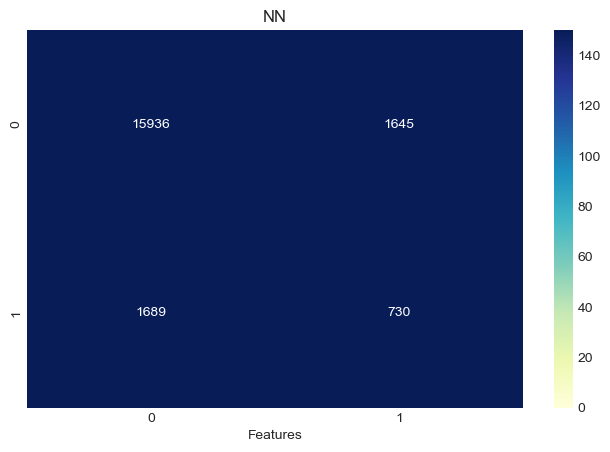

In [90]:
y_pred = model.predict(X_test)
NN_y_pred = np.where(y_pred > 0.5, 1, 0)
TREECM = confusion_matrix(y_test, NN_y_pred)

f, axes = plt.subplots(figsize=(8, 5), dpi = 100)
sns.heatmap(TREECM, annot = True, fmt = 'd', vmin = 0 , vmax = 150, cmap = 'YlGnBu')
axes.set_title('NN')
axes.set_xlabel('Features')